# Part I - Ford GoBike System Data
## by Vanessa Arhin

### Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#import my dataset using pandas 
df = pd.read_csv(r'C:\Users\vanes\OneDrive\Desktop\Projects- ALX-T\201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Data Cleaning

In [6]:
# make a copy of the original dataset
df_copy = df.copy()

Drop columns that will not be needed

In [7]:
# drop not needed columns, use pandas .drop() method
df_copy.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude', 'end_station_longitude'],
            axis = 1, inplace = True)

In [8]:
# check to see if the code produce the right outcome.
df_copy.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No


Change datatype for some columns.

In [9]:
def change_type(col, type):
    """ This function changes the datatype of an entire column in a dataframe.
    """
    df_copy[col] = df_copy[col].astype(type)

In [10]:
change_type('start_time', 'datetime64[ns]')
change_type('end_time', 'datetime64[ns]')
change_type('start_station_id', 'str')
change_type('end_station_id', 'str')
change_type('bike_id', 'str')
change_type('member_birth_year', 'str')

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183412 non-null  object        
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  object        
 8   user_type                183412 non-null  object        
 9   member_birth_year        183412 non-null  object        
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  183412 non-null  object        
dtypes: datetime64[ns

In [12]:
# create a new column, consisting of only the day of the week extracted from the start_time column
df_copy.insert(3, 'start_time_day', df_copy['start_time'].dt.dayofweek, True )
df_copy.head()

,duration_sec,start_time,end_time,start_time_day,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,3,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,3,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,nan,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,3,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,3,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,3,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [13]:
# convert duration_sec to minutes
df_copy.insert(1, 'duration_min', round(df_copy['duration_sec'] / 60.0, 2), True )

In [14]:
df_copy.head()

,duration_sec,duration_min,start_time,end_time,start_time_day,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,869.75,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,3,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,708.68,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,3,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,nan,NaN,No
2,61854,1030.90,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,3,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,608.17,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,3,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,26.42,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,3,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> There are 183412 records(bike rides) with 16 features in the dataset for San Franciso Bay Area in 2019. These features are duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip.

### What is/are the main feature(s) of interest in your dataset?

>  - I'm interested in finding the average duration of a trip.<br>   - What day of the week are most trips taken?
>  <br>- What bike stations are most popular? (in terms of pickup and drop-off)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - duration_sec <br>  - start_time <br> - start_station_id <br>- end_station_id <br>
  
  

## Univariate Exploration
> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

#### Which user type is more in the dataset, subscriber or customer?

In [15]:
user_types = df_copy['user_type'].value_counts()
user_types

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

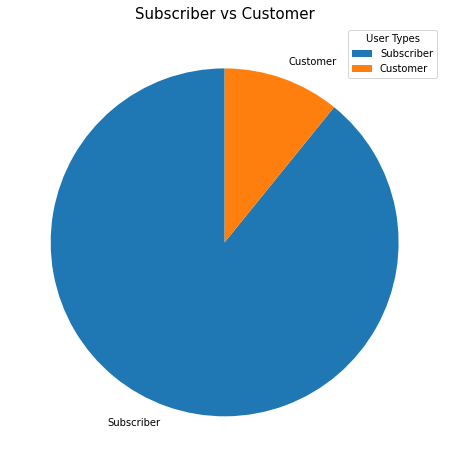

In [16]:
plt.figure(figsize=(8,8))
plt.pie(user_types, labels = ['Subscriber', 'Customer'], startangle = 90);
plt.legend(['Subscriber', 'Customer'], title = 'User Types')
plt.title('Subscriber vs Customer', size=15);

From the above visualization(pie chart), it can be deduced that Ford GoBike System has more subscribers than customers.

#### What day of the week are most trips taken?

In [17]:
start_time_day = df_copy['start_time_day'].value_counts().sort_index()
start_time_day

0    26852
1    31813
2    29641
3    35197
4    28981
5    15405
6    15523
Name: start_time_day, dtype: int64

In [18]:
labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

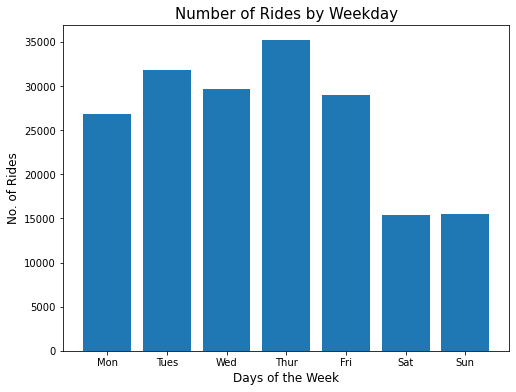

In [19]:
plt.figure(figsize=(8,6))
plt.bar(labels, start_time_day)
plt.title('Number of Rides by Weekday', size = 15)
plt.xlabel('Days of the Week', size = 12)
plt.ylabel('No. of Rides', size = 12);

Most trips are taken during weekdays especially on **Thursdays**

#### When are the peak hours?

In [20]:
# create a new column to extract the hour from the start_time column
df_copy.insert(4, 'start_hour', df_copy['start_time'].dt.hour, True )
df_copy.head()

,duration_sec,duration_min,start_time,end_time,start_hour,start_time_day,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,869.75,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,17,3,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,708.68,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,18,3,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,nan,NaN,No
2,61854,1030.90,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,12,3,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,608.17,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,17,3,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,26.42,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,23,3,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [21]:
df_copy['start_hour'].value_counts()

17    21864
8     21056
18    16827
9     15903
16    14169
7     10614
19     9881
15     9174
12     8724
13     8551
10     8364
14     8152
11     7884
20     6482
21     4561
6      3485
22     2916
23     1646
0       925
5       896
1       548
2       381
4       235
3       174
Name: start_hour, dtype: int64

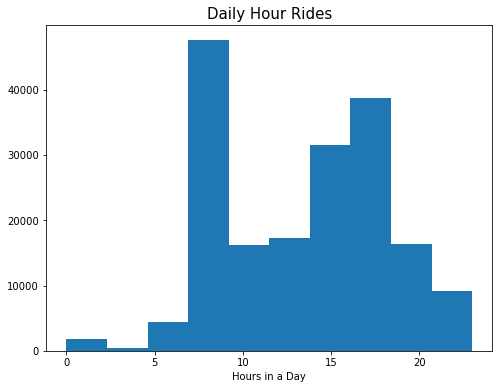

In [22]:
plt.figure(figsize=(8,6))
plt.hist(data = df_copy, x = 'start_hour')
plt.xlabel('Hours in a Day')
plt.title('Daily Hour Rides', size=15);

From the histogram, it can be seen that more rides are taken during the hours of **7am to 10am**

#### Which gender takes more rides?

In [23]:
df_copy['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [24]:
gender = df_copy['member_gender'].value_counts()
gender

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

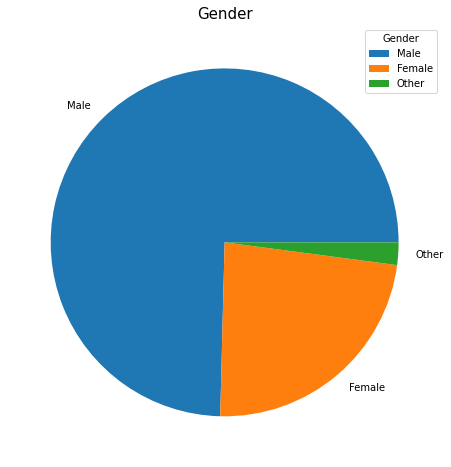

In [25]:
plt.figure(figsize=(8,8))
plt.pie(gender, labels = ['Male', 'Female', 'Other']);
plt.legend(['Male', 'Female', 'Other'], title = 'Gender')
plt.title('Gender', size=15);

There more male users(riders) who use bike sharing system in San Francisco Bay Area. 

#### What bike stations are most popular? (in terms of pickup and drop-off)

In [26]:
# get the top 10 stations with most start rides
top_start = df_copy['start_station_id'].value_counts().nlargest(10)
top_start

58.0    3904
67.0    3544
81.0    3052
21.0    2895
3.0     2760
15.0    2710
30.0    2703
5.0     2327
22.0    2293
16.0    2283
Name: start_station_id, dtype: int64

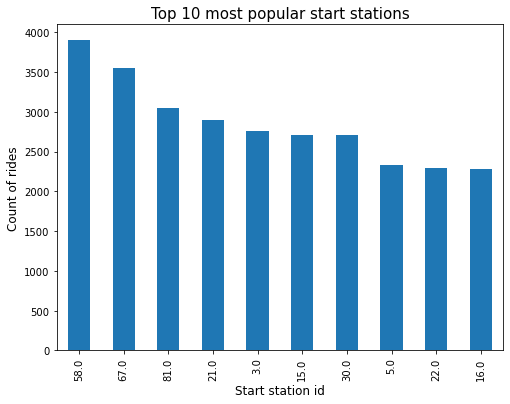

In [27]:
plt.figure(figsize=(8,6))
top_start.plot(kind = 'bar')
plt.xlabel('Start station id', size = 12)
plt.ylabel('Count of rides', size = 12)
plt.title('Top 10 most popular start stations', size = 15); 

In [28]:
# get the name of the most start popular station, number 1 on the list
df_copy.loc[df_copy['start_station_id'] == '58.0', 'start_station_name'].head()

38     Market St at 10th St
54     Market St at 10th St
110    Market St at 10th St
114    Market St at 10th St
190    Market St at 10th St
Name: start_station_name, dtype: object

The most popular start station for bike rides in San Francisco Bay Area is **Market St at 10th St** with station id 58.

In [29]:
# get the top 10 stations with most end rides
top_end = df_copy['end_station_id'].value_counts().nlargest(10)
top_end

67.0    4857
58.0    3973
21.0    3647
15.0    3368
3.0     2997
30.0    2947
81.0    2872
6.0     2512
5.0     2353
16.0    2338
Name: end_station_id, dtype: int64

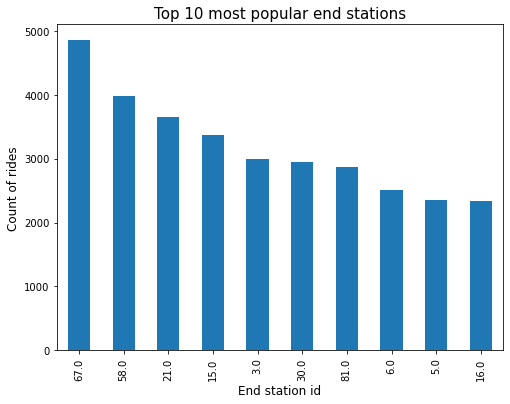

In [30]:
plt.figure(figsize=(8,6))
top_end.plot(kind = 'bar')
plt.xlabel('End station id', size = 12)
plt.ylabel('Count of rides', size = 12)
plt.title('Top 10 most popular end stations', size = 15);

In [31]:
# get the name of the most end popular station, number 1 on the list
list(df_copy.loc[df_copy['end_station_id'] == '67.0', 'end_station_name'].head())

['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)']

The most popular end station for bike rides in San Francisco Bay Area is **San Francisco Caltrain Station 2  (Townsend St at 4th St)** with station id 67.

#### Do a lot of users user Ford GoBike for all their trips?

In [32]:
all_trip = df_copy['bike_share_for_all_trip'].value_counts().sort_values(ascending = True)
all_trip

Yes     17359
No     166053
Name: bike_share_for_all_trip, dtype: int64

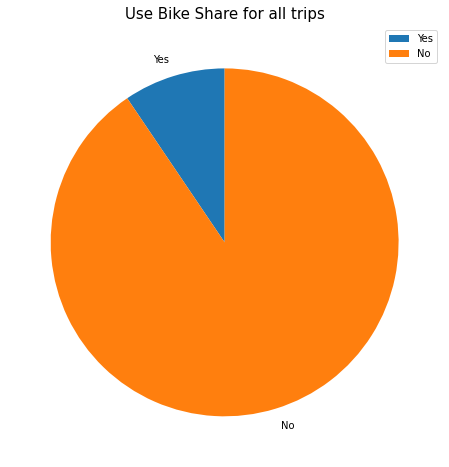

In [33]:
plt.figure(figsize=(8,8))
plt.pie(all_trip, labels = ['Yes', 'No'], startangle = 90);
plt.legend(['Yes', 'No'])
plt.title('Use Bike Share for all trips', size=15);

Majority of the users **do not** use Ford GoBike for all their trips

#### What is the duration of most rides?

In [34]:
df_copy['duration_min'].describe()

count    183412.000000
mean         12.101301
std          29.906501
min           1.020000
25%           5.420000
50%           8.570000
75%          13.270000
max        1424.070000
Name: duration_min, dtype: float64

In [35]:
np.log10(df_copy['duration_min'].describe())

count    5.263428
mean     1.082832
std      1.475766
min      0.008600
25%      0.733999
50%      0.932981
75%      1.122871
max      3.153531
Name: duration_min, dtype: float64

In [36]:
bins = 10 ** np.arange(0.008, np.log10(df_copy['duration_min'].max())+ 0.1, 0.1)

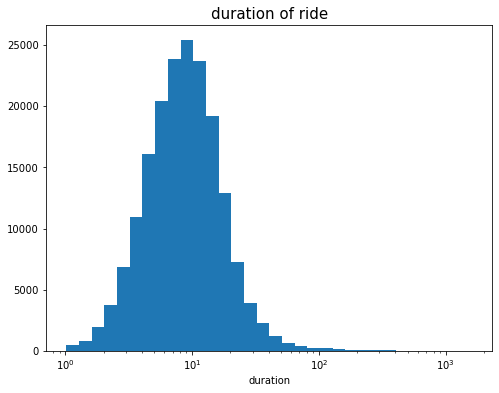

In [37]:
plt.figure(figsize=(8,6))
plt.hist(data = df_copy, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xlabel('duration')
plt.title('duration of ride', size = 15)
plt.show()

Most rides fall between 8 to 20 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration (converted to minutes) variable in the dataset was highly skewed with many rides duration under 100 mins and the range was between 1 min and 1425 mins. I used log scale to plot the chart for duration since most of the rides were under 100 minutes. 
Also, I extracted the hour and day from the start time into seperate columns to help me determine what the peak hours and days are.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I performed some adjustments to the dataset. I changed the datatype for some columns, dropped some columns that was not going to be needed and created new columns with the data in already existing columns. I changed the start_time and end_time columns to a datatime datatype because I need to extract the day and hour to help with my analysis.  

## Bivariate Exploration
>In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

#### At what times and days are most trips taken?

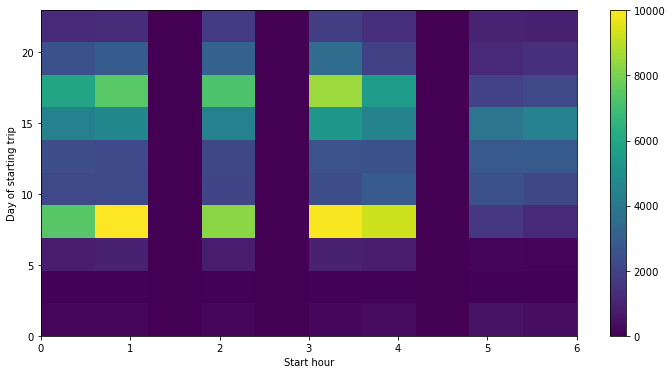

In [38]:
plt.figure(figsize = (12,6))
plt.hist2d(data = df_copy, x = 'start_time_day', y = 'start_hour')
plt.xlabel('Start hour')
plt.ylabel('Day of starting trip')
plt.colorbar();

A lot of trips are taken on Tuesdays, Wednesdays and Thursdays between the hours of **7am - 9am** and also **4pm - 6pm**.

#### day of the week vrs user_type

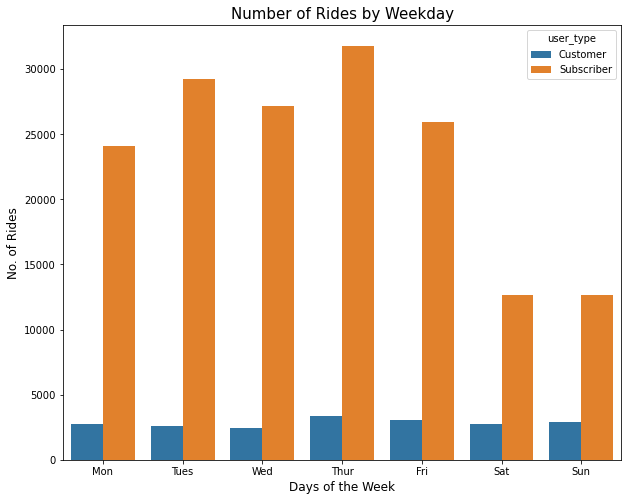

In [39]:
plt.figure(figsize=(10,8))

sb.countplot(data = df_copy, x = 'start_time_day', hue = 'user_type')
plt.title('Number of Rides by Weekday', size = 15)
plt.xticks([0,1,2,3,4,5,6], labels)
plt.xlabel('Days of the Week', size = 12)
plt.ylabel('No. of Rides', size = 12);

On a daily basis more subscribers take more trips than customers and especially on Thursdays.

#### Does user type determine the duration of a ride?

<AxesSubplot:xlabel='duration_min', ylabel='user_type'>

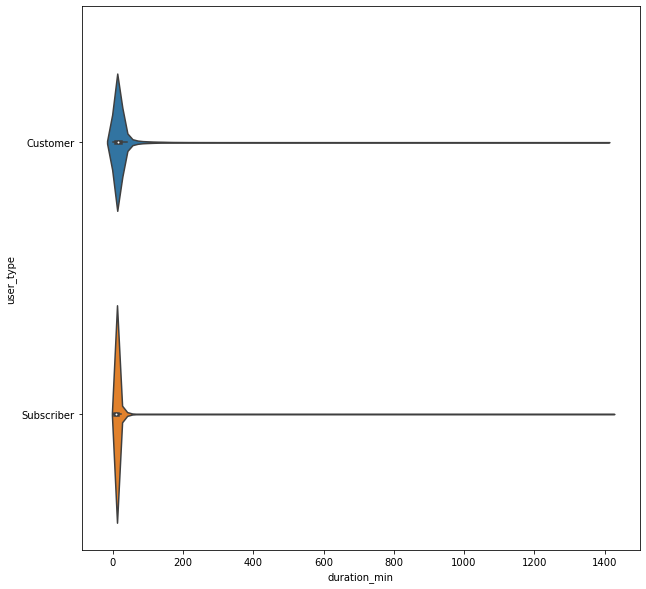

In [40]:
#create a violin plot using the duration in minutes and the user type
plt.figure(figsize=(10,10))
sb.violinplot(data=df_copy, x='duration_min', y='user_type' )

It appears that more **customers** have a ride duration less than 100 minutes and more **subscribers** have rides greater than 100 minutes

In [41]:
# query the dataset for rides that have a duration lower than 100 minutes
less_100= df_copy.query('duration_min < 100')

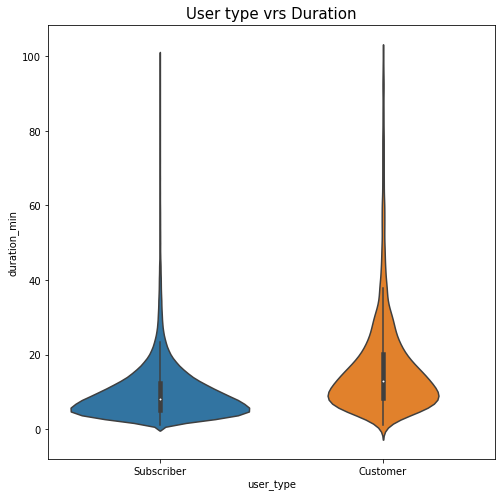

In [42]:
plt.figure(figsize=(8,8))
sb.violinplot(data=less_100, y='duration_min', x='user_type' );
plt.title('User type vrs Duration', size =15);

There are more subscribers with a ride duration less than 20 minutes.

####  What gender rides for the longest?


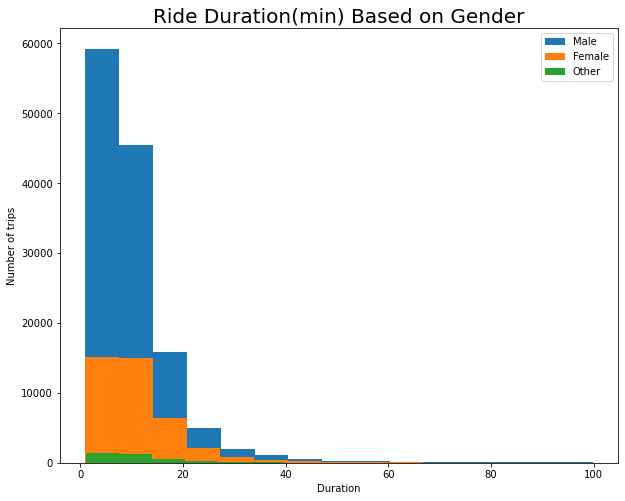

In [43]:
plt.figure(figsize = (10,8))

by_gender = df_copy.query('duration_min < 100')
by_gender.query('member_gender == "Male"').duration_min.hist(bins=15, label='Male')
by_gender.query('member_gender == "Female"').duration_min.hist(bins=15, label='Female')
by_gender.query('member_gender == "Other"').duration_min.hist(bins=15, label='Other')
plt.title('Ride Duration(min) Based on Gender', size = 20)
plt.xlabel('Duration')
plt.ylabel('Number of trips')
plt.grid(False);
plt.legend();

There are more male riders than any other gender.

#### What is the distribution of member's gender and user type?

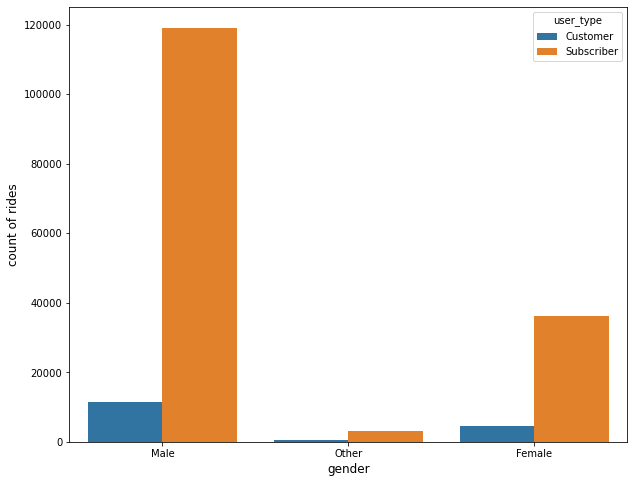

In [44]:
#create a violin plot using the duration in minutes and the user type
plt.figure(figsize=(10,8))
sb.countplot(data=df_copy, x='member_gender', hue='user_type')
plt.xlabel('gender', size = 12)
plt.ylabel('count of rides', size = 12);

The highest number of users are **male subscribers** followed by **female subscribers**. Also for all gender types there's a lower count of customer rides

#### bikes used for the longest trip duration

In [45]:
# checking for the bikes with highest total duration in minutes 
ride_dur = df_copy.groupby(['bike_id']).sum()['duration_min'].nlargest(10)
ride_dur

bike_id
5481    3626.88
5282    3399.57
5561    3151.64
4964    3058.93
5373    3001.83
4714    2891.79
4728    2813.86
4637    2767.34
5048    2662.94
6235    2661.98
Name: duration_min, dtype: float64

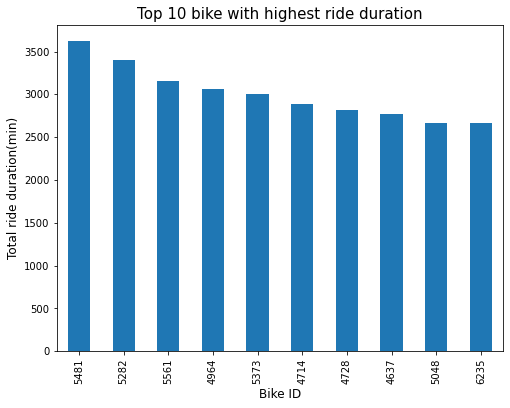

In [46]:
plt.figure(figsize=(8,6))
ride_dur.plot(kind = 'bar')
plt.xlabel('Bike ID', size = 12)
plt.ylabel('Total ride duration(min)', size = 12)
plt.title('Top 10 bike with highest ride duration', size = 15);

The chart above could help determine help determine which bikes needs routine maintenance. Also, the qualities of the bike that makes it able to be used for long rides.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> By comparing the start hour and day, a users use take rides early mornings and late afternoons on Mondays, Wednesdays and Thursdays.
More subscribers take more trips than regular customers.
Most user types use the bikes for short trips most especially subscribers, and also most long trips are taken by subscribers as well.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There's a vast difference between male and female riders, way too many male riders. But it's not so surprising male riders take the longest trips.

## Multivariate Exploration
> Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.

#### Average Ride Duration of Gender per User Type

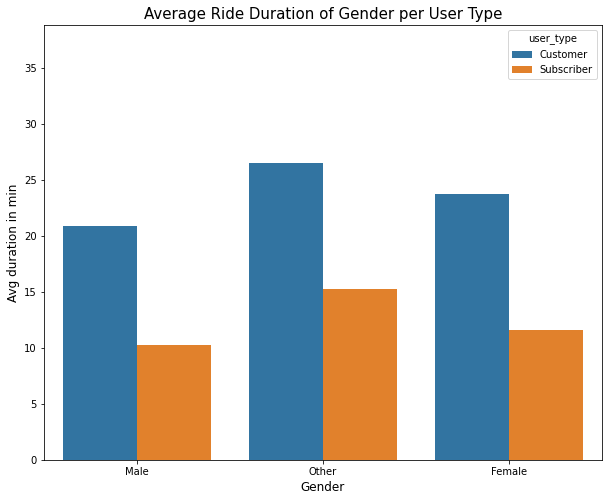

In [47]:
plt.figure(figsize = (10,8))
order = ['male', 'female', 'other']
sb.barplot(data = df_copy, x = 'member_gender', y = 'duration_min', hue = 'user_type', errwidth = 0)
plt.xlabel('Gender', size=12)
plt.ylabel('Avg duration in min', size=12)
plt.title('Average Ride Duration of Gender per User Type', size = 15);

Gender classified as **Other** and are **customers** have the highest count of rides the fall under the average ride duration(min) which is about 35mins

In [48]:
# save a copy of the cleaned dataset
df_copy.to_csv('bike_copy.csv')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> My multivariate analysis supported by bivariate analysis in the previous section. In this section more female than male riders that are customers take shorter trips. More customers take shorter trips probably that is the reason they do not have a subscription.

### Were there any interesting or surprising interactions between features?

> Other gender takes the most short trips. In the previous section, most trips were taken by subscribers and were spread across from lowest to highest duration. 

## Conclusions

> The average duration of a trip is about 30 mins. Most trips are taken on Tuesdays, Wednesdays and Thursdays early mornings and late afternoons. Subscribers take more rides than customers. The most popular start station at San Francisco Bay area is Market St at 10th St.